<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/PMdarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.2MB/s 
     |████████████████████████████████| 9.5MB 18.0MB/s 
     |████████████████████████████████| 2.1MB 48.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [2]:
from pmdarima.arima import auto_arima

In [12]:
import pmdarima as pm

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostcca.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['a'] = dfa['a']
df['a'] = pd.to_numeric(df['a'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

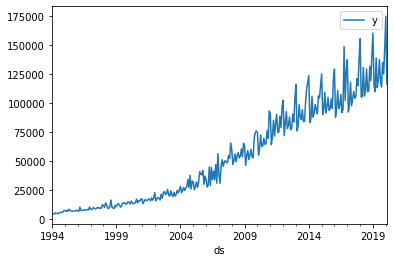

In [6]:
df.plot()

In [8]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.09233356415736649, True)

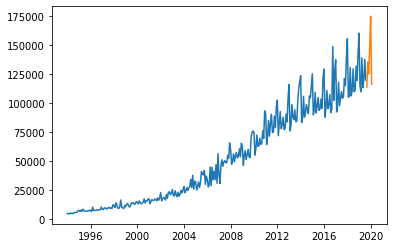

In [10]:
train = df.iloc[:-6].copy()  
test =  df.iloc[-6:].copy() 
plt.plot(train) 
plt.plot(test)

In [13]:
model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_q=5, max_d=5, start_P=0, D=1, start_Q=0, max_P=5, 
                      max_Q=5, max_D=5, seasonal= True, m= 12, error_action = 'warn', trace = True, supress_warnings=True, stepwise=True, 
                      random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6081.416, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5941.820, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5855.508, Time=1.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5935.972, Time=0.31 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5856.436, Time=1.79 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5874.782, Time=1.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5875.443, Time=1.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.85 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=6009.855, Time=0.24 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5857.166, Time=1.53 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=5872.145, Time=0.58 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=5931.736, Time=0.30 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=5873.566, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=5875.026, Time=1.18 sec

Best model:  ARIMA(0,1,

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  308
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2924.754
Date:                            Mon, 01 Feb 2021   AIC                           5855.508
Time:                                    20:18:57   BIC                           5866.569
Sample:                                         0   HQIC                          5859.937
                                            - 308                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8299      0.033    -24.871      0.000      -0.895      -0.764
ma.S.L12      -0.5319      0.036    -14.957      0.000      -0.602      -0.462
sigma2      2.383e+07    7.8e+05     30.559      0.000    2.23e+07    2.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              3974.96
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):              17.60   Skew:                             2.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
prediction = pd.DataFrame(model.predict(n_periods = 6), index = test.index)
prediction

,0
ds,
2019-09-01,120038.774400
2019-10-01,142776.551327
2019-11-01,128713.810162
2019-12-01,150825.732158
2020-01-01,166600.211414
2020-02-01,121040.632130


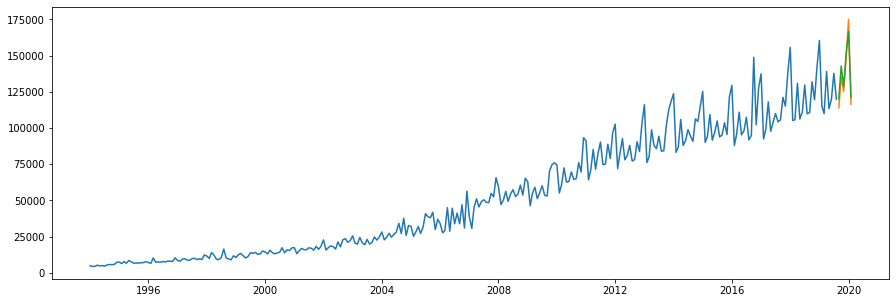

In [19]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test, label= 'Test')
plt.plot(prediction, label = 'Previsão')
plt.show()

In [20]:
from sklearn.metrics import r2_score
test['0'] = prediction
r2_score(test['y'], test['0'])

0.920436953103267